In [1]:
# CAMPUS RECRUITMENT DATASET 
# MODEL FOR PREDICTING WILL THE STUDENTS GET PLACED OR NOT

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [3]:
# IMPORTING THE DATASET
campus_df = pd.read_csv(r"C:\Users\ASUS\Downloads\Placement_Data_Full_Class.csv")

In [4]:
print("Number of records: ", campus_df.shape[0],
       "\n Number of features: ",campus_df.shape[1])

Number of records:  215 
 Number of features:  15


In [5]:
campus_df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [6]:
campus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
campus_df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


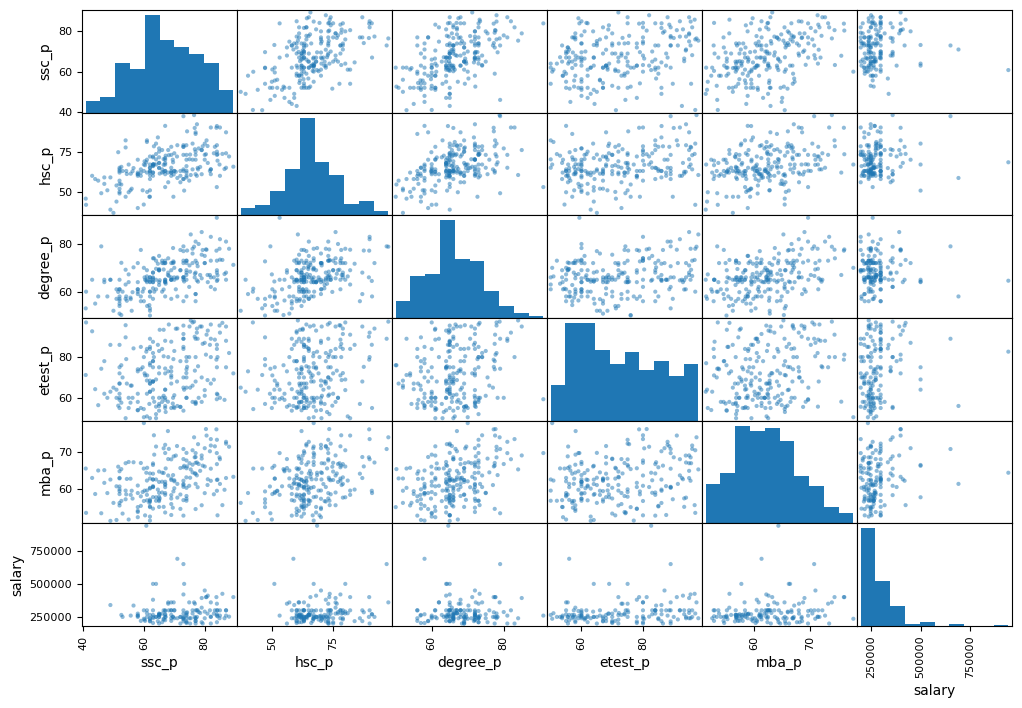

In [8]:
numerical_attributes = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "salary"]
from pandas.plotting import scatter_matrix
scatter_matrix(campus_df[numerical_attributes], figsize=(12, 8))
plt.show()

In [9]:
campus_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [10]:
duplicate_rows = campus_df.duplicated()
print("Number of duplicate records: ", len(campus_df[duplicate_rows]))

Number of duplicate records:  0


In [11]:
missing_values = campus_df.isnull().sum()

In [12]:
df_filled = campus_df.fillna(0)
campus_df.fillna(0, inplace=True)


In [13]:
#missing value count
missing_value_count = pd.DataFrame(campus_df.isna().sum())
missing_value_count.columns = ["Count"]
print("Total number of columns with missing values :", 
      len(missing_value_count
    [missing_value_count.Count > 0]))

Total number of columns with missing values : 0


In [14]:
#campus_df.drop(['sl_no'], axis=1)

In [15]:
corr=campus_df.corr()
corr

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23744\3159860016.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=campus_df.corr()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


<Axes: >

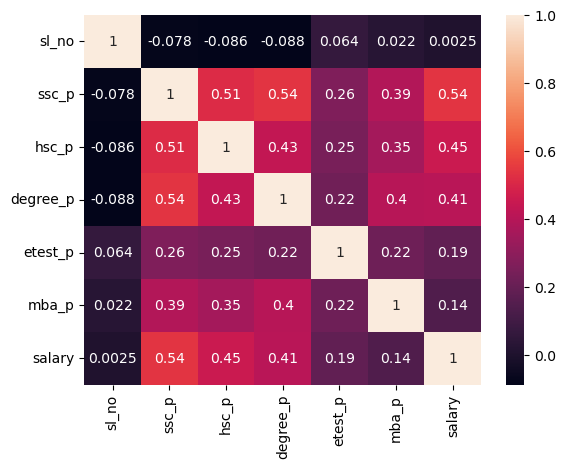

In [16]:
sns.heatmap(corr, annot=True)

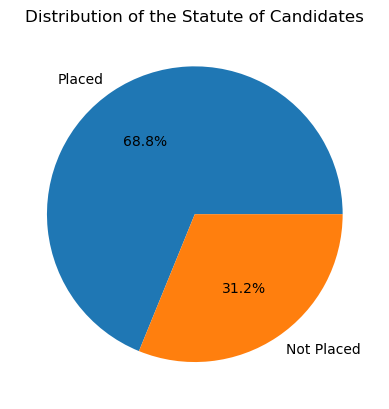

In [17]:
status_counts = campus_df['status'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%')
plt.title('Distribution of the Statute of Candidates')
plt.show()

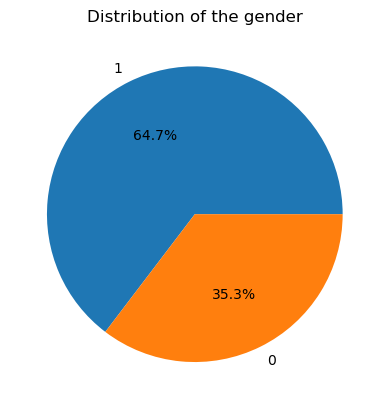

In [56]:
status_counts = campus_df['gender'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%')
plt.title('Distribution of the gender')
plt.show()

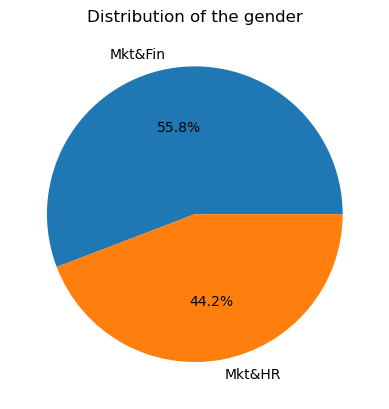

In [19]:
status_counts = campus_df['specialisation'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%')
plt.title('Distribution of the gender')
plt.show()

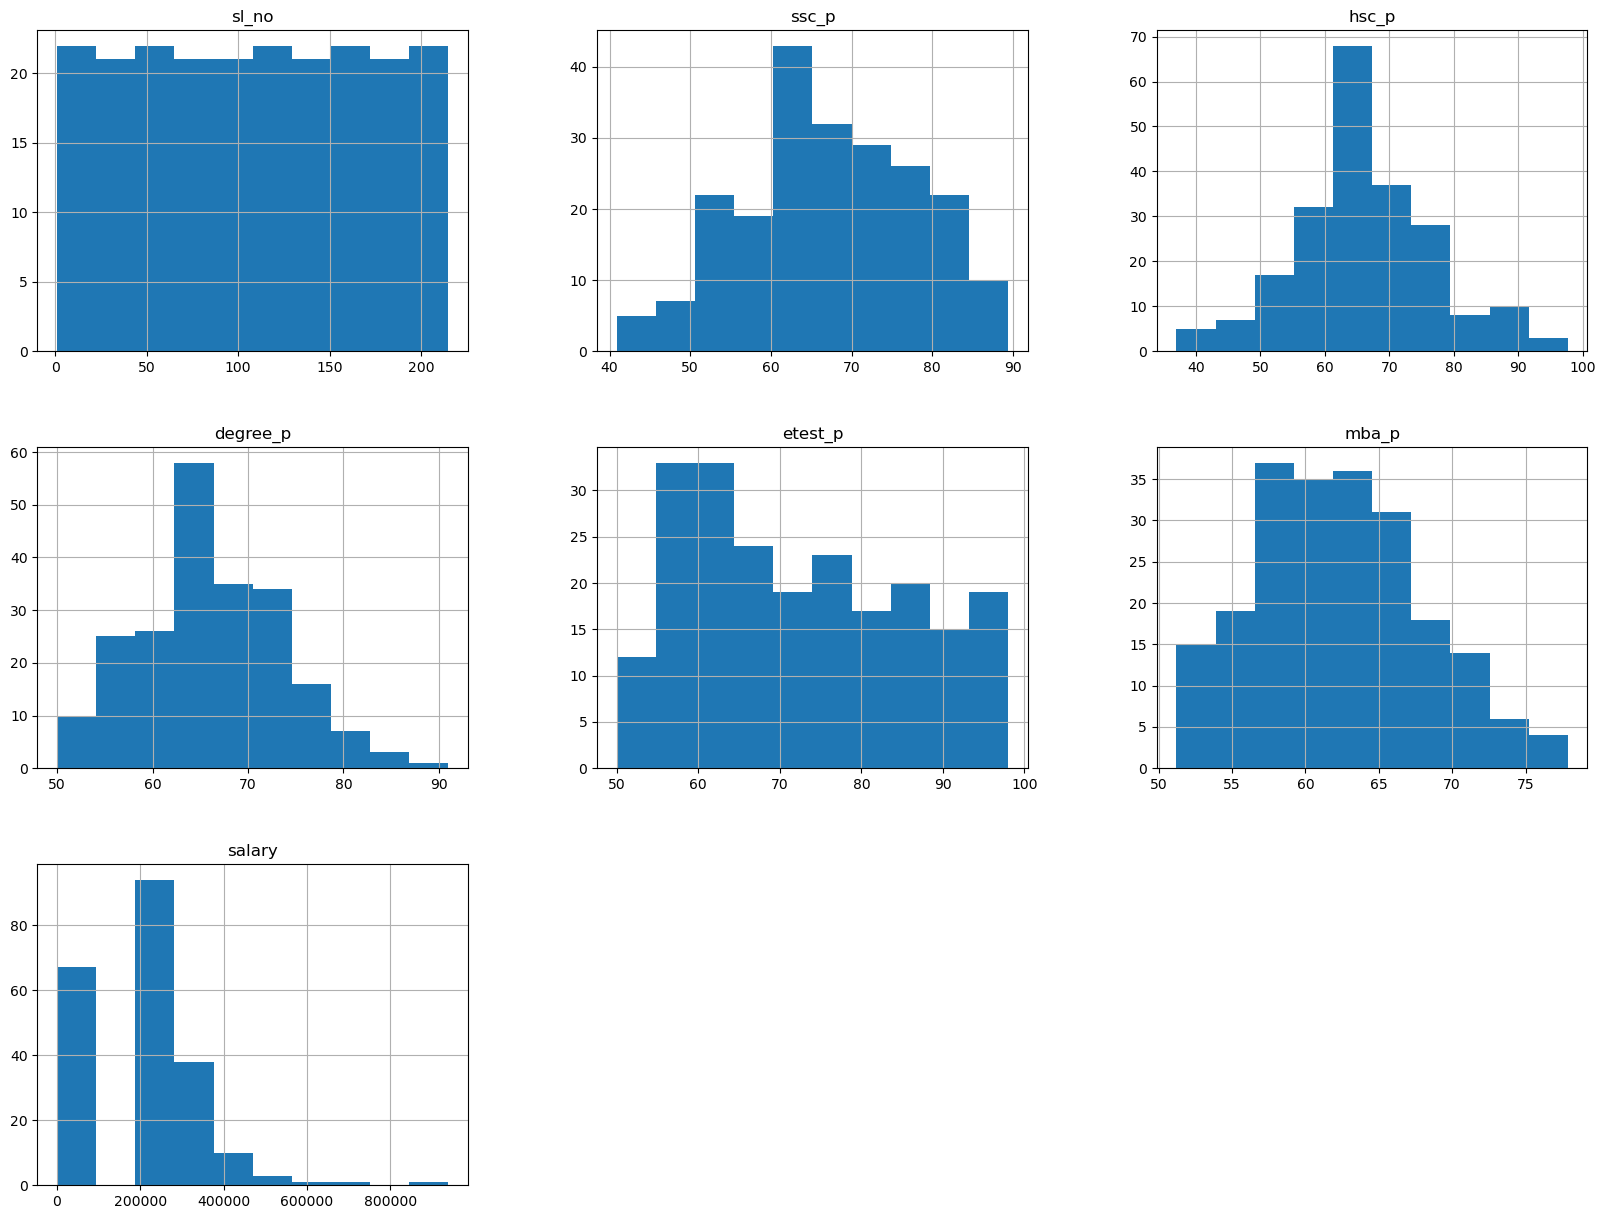

In [20]:
campus_df.hist(bins = 10, figsize= (20, 15))
plt.show()

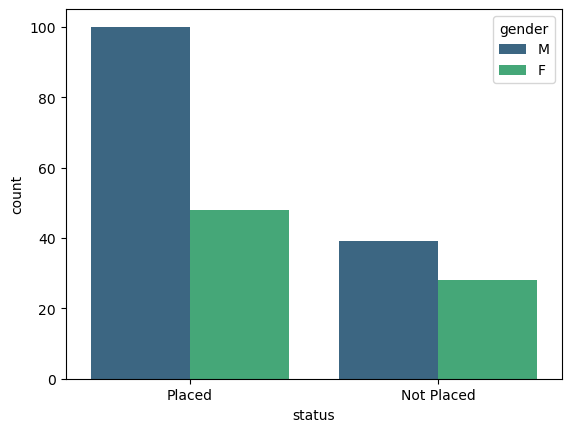

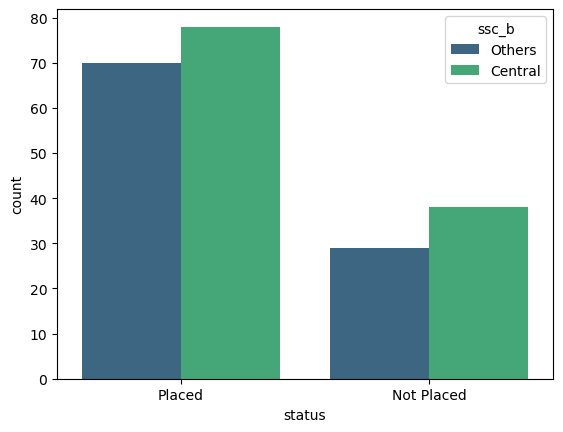

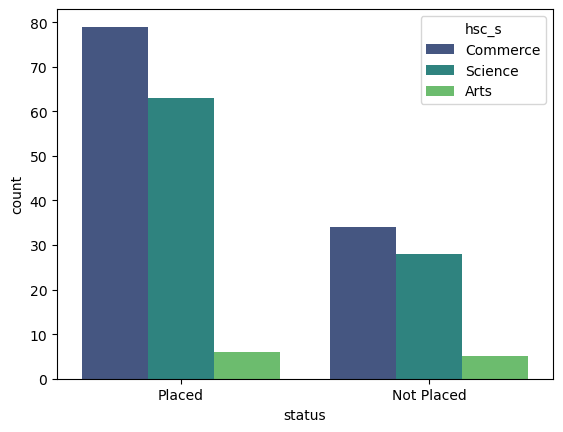

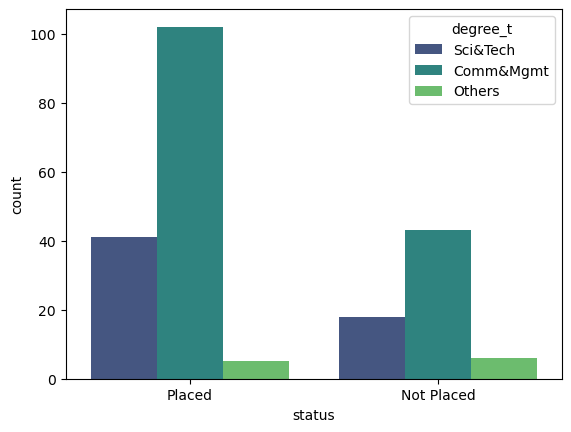

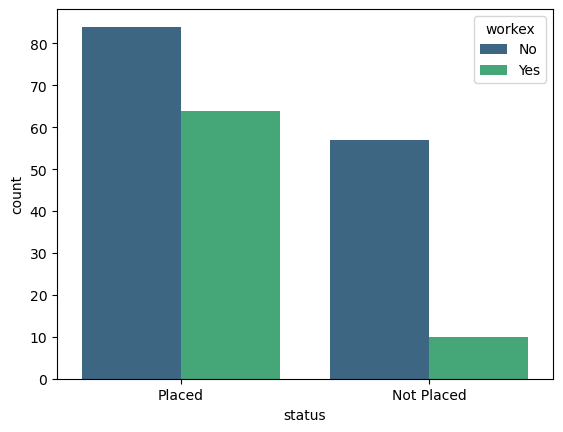

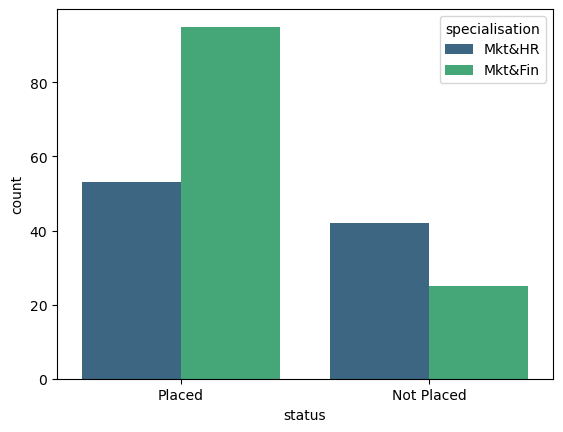

In [21]:
col_list = ['gender', 'ssc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
for g in col_list:
    sns.countplot(data = campus_df, x = "status", hue = g, palette = "viridis")
    plt.show()


In [22]:
campus_df['status'] = campus_df['status'].map({'Placed' : 1, 'Not Placed' : 0})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23744\2053916178.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = campus_df.corr()['status'][:-1]


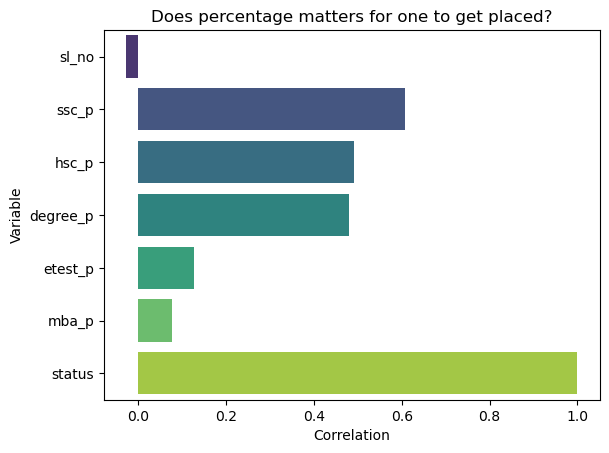

In [23]:
corr = campus_df.corr()['status'][:-1]

sns.barplot(x = corr.values, y = corr.index, palette = 'viridis')
plt.title('Does percentage matters for one to get placed?')
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23744\403790259.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(campus_df.corr(), annot = True)


<Axes: >

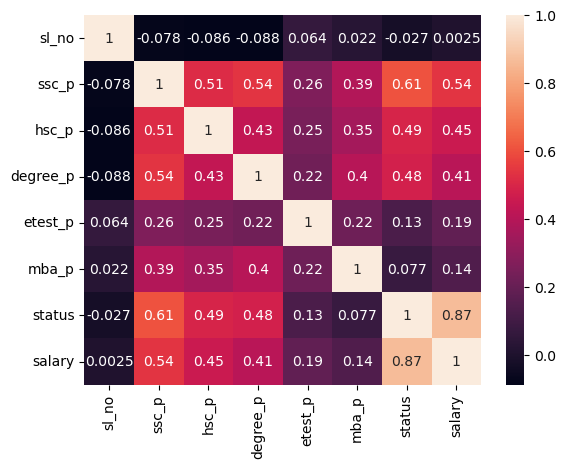

In [24]:
sns.heatmap(campus_df.corr(), annot = True)

In [25]:
counts = campus_df.groupby("status")["status"].count()
counts

status
0     67
1    148
Name: status, dtype: int64

In [26]:
list_str = campus_df.select_dtypes(include = 'object').columns
le = LabelEncoder()

for c in list_str:
    campus_df[c] = le.fit_transform(campus_df[c])

In [27]:
X = campus_df.drop('status', axis = 1)
y = campus_df['status']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.33, random_state = 10)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 2)

In [29]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=2)

In [30]:
y_predict = rf.predict(xtest)
print(accuracy_score(ytest, y_predict)*100)
print(precision_score(ytest, y_predict))
print(recall_score(y_predict, ytest))
print(y_predict)
print("confusion matrix : \n", confusion_matrix(y_predict, ytest))

87.32394366197182
1.0
1.0
[1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0]
confusion matrix : 
 [[25  9]
 [ 0 37]]


In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1)

In [32]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=1)

In [33]:
y_predict_tree = dt.predict(xtest)

In [34]:
print(accuracy_score(ytest, y_predict_tree)*100)
print(recall_score(y_predict_tree, ytest))
print(y_predict_tree)
print("confusion matrix : \n", confusion_matrix(y_predict_tree, ytest))

100.0
1.0
[1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1]
confusion matrix : 
 [[25  0]
 [ 0 46]]


In [35]:
from sklearn.svm import SVC

In [36]:
SVC = SVC(kernel='poly')

In [37]:
SVC.fit(xtrain, ytrain)

SVC(kernel='poly')

In [38]:
y_pred_svc = SVC.predict(xtest)

In [39]:
print(accuracy_score(ytest, y_pred_svc)*100)
print(recall_score(y_pred_svc, ytest))
#print(y_predict_tree)
print("confusion matrix : \n", confusion_matrix(y_pred_svc, ytest))

100.0
1.0
confusion matrix : 
 [[25  0]
 [ 0 46]]


In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [41]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [42]:
y_pred_model = model.predict(xtest)
print(accuracy_score(y_pred_model, ytest))

1.0


In [43]:
rf_parameters_grid ={
    'n_estimators' : [200, 500],
    'max_features' : ['sqrt, log2'],
    'criterion' : ['gini', 'entropy']
}

In [44]:
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_grid_cv = GridSearchCV(rf, rf_parameters_grid, scoring='roc_auc', cv=1, verbose=0 )

In [45]:
rf_best_params = {'criterion' : 'entropy' , 'max_depth': 2, 'max_features' : 'log2', 'n_estimators': 10}

In [46]:
rf = RandomForestClassifier(**rf_best_params)
rf.fit(xtrain, ytrain)
y_pred_rf = rf.predict(xtest)
y_score_rf = rf.predict_proba(xtest)[:, 1]

In [47]:
from sklearn import metrics

In [48]:
print(accuracy_score(ytest, y_pred_rf))

0.9014084507042254


In [49]:
print(y_score_rf)

[0.88805435 0.22188039 0.85134071 0.83535295 0.81449692 0.18124429
 0.88392165 0.82114348 0.37329718 0.5024784  0.95960207 0.82248744
 0.90412577 0.62114348 0.66924427 0.30188039 0.645662   0.9301903
 0.68219204 0.30134077 0.90682787 0.88077462 0.73849932 0.16354706
 0.4327032  0.50813233 0.73164506 0.76520899 0.87555435 0.46520899
 0.92583341 0.40122172 0.22188039 0.16354706 0.26556368 0.87848744
 0.76559003 0.45919844 0.845662   0.54018467 0.91799518 0.95960207
 0.83265085 0.91256098 0.79127351 0.73849932 0.37247898 0.97210207
 0.88812714 0.8333386  0.77440484 0.91333341 0.93049518 0.35900598
 0.9301903  0.48478117 0.89327462 0.95960207 0.83784808 0.95960207
 0.53194994 0.87555435 0.85785712 0.95960207 0.40547739 0.86741213
 0.95960207 0.43503654 0.7301903  0.84000807 0.84700596]


In [50]:
print(precision_score(ytest, y_pred_rf))

0.8679245283018868


In [51]:
print(recall_score(ytest, y_pred_rf))

1.0


In [52]:
print(f1_score(ytest, y_pred_rf))

0.9292929292929293
